<a href="https://colab.research.google.com/github/RafaelNovais/Python/blob/master/Assignment_2_Periphery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CT5132 / CT5148 Assignment 2: Periphery

**Summary**: In this assignment, you have to investigate, explain, and implement one or more methods of finding the **periphery** of a dataset. The periphery doesn't have a single definition, so you have some freedom to look at different definitions and approaches.

You are allowed to use any sources and resources you like, including code and documents from the internet, existing libraries, and generative AI methods.

**Due date**: as announced on Canvas.

**Weight**: this assignment is worth 20% of the module.

**Groups**: you may work in a group of 1 (solo), 2, or 3, but you must not work with any student you previously worked with in any assignment in this module or any other module.

If working in a group:
* You must notify the lecturer by email 2 weeks before the due date, cc-ing all students in the group, and state that you have not worked together in any other assignment.
* Students in a group must work together on all aspects -- you cannot split tasks up so that one student doesn't understand how another student's part of the project works.
* All students in the group must submit and the submissions must be identical.
* All communication should cc all group members.

**Resources**:

* You may use code you find on the internet, but you must clearly cite the URL and clearly mark which parts of your solution are from that URL.
* You may use code completion and generative AI methods, such as GitHub Copilot and ChatGPT. When doing so you must clearly document your methodology when using it, eg the system(s) you use, the prompts, how you notice when the AI gets things wrong, how you improve it, etc. You must clearly document which parts of your submission come from generative AI.
* You may discuss with other students/groups, but you may not show your work to them or view their work.

**Interviews**: Post-submission vivas will be used in some cases to give students an opportunity to demonstrate their learning.

**Grading**: A basic solution (one simple method, based on a single source, demonstrated on one dataset, with short explanation) will be enough for a pass grade. For a very high grade, you can add more value by, for example:

* Investigating multiple methods,
* describing your methods correctly,
* implementing and comparing them (results, visualisations, pros and cons),
* on multiple datasets with different properties;
* providing a sophisticated account of the use of generative AI;
* integrating information from multiple sources;
* implementing your methods as Scikit-Learn estimators (NB: for some approaches to the problem there is no "right answer", so we may or may not need to implement `score`),
* with clean code and appropriate documentation and comments;
* with vectorisation where appropriate;
* describing the run-time or computational complexity.

These are examples of how you can add value, not an exhaustive list.

**NB**: some approaches to the problem are based on machine learning, but others are not. This is not a machine learning module, so you are not obliged to choose any machine learning methods.

There is no lower or upper bound on word-count or line-count. However, a high-quality submission with 3 methods and 3 datasets could be done in less than 100 lines and less than 1000 words.

**Submission**: submit an `ipynb` file containing code, results, and explanations. If you need to submit any data files as well, you can submit a `zip` file. Include your name and ID.

**Rafael Novais de Melo -
23113607**

### Problem definition

Given a dataset of points `X` of shape `(n_samples, n_features)`, the **periphery** is a subset of those points which are in some sense "on the border", or "outside the main dataset". The image below shows one possible conception of the periphery. I created it by hand for this dataset. Your job is to investigate methods of doing it automatically for any dataset. Some relevant ideas include the **convex hull**, **anomaly detection**, **outliers**, **bounding box**.

(Why is the periphery interesting? One motivation is when investigating the performance of regression and classification models in **extrapolation**: if we train only on the core, how is performance on the unseen periphery? But this is just motivation: we are not required to investigate extrapolation for this assignment.)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
# Create a random dataset
np.random.seed(1)
X = np.random.rand(30, 2)
# Create labels: 0 => core, 1 => periphery
labels = np.zeros(len(X))
# by hand!
labels[[1, 10, 12, 13, 14, 19, 20]] = 1
core = X[labels == 0]
periphery = X[labels == 1]
plt.scatter(core[:, 0], core[:, 1], c='blue', label='Core')
plt.scatter(periphery[:, 0], periphery[:, 1], c='red', label='Periphery')
plt.legend()
plt.show()


Please enter the file path or URL to upload: /content/drive/MyDrive/Master/Courses/pandas-completo/Data Science/Beer.csv
Columns in the DataFrame:
date
temp_mean
temp_min
temp_max
rain
wknd
consumption
Enter the name of a column: temp_max
Enter the name of a column: consumption


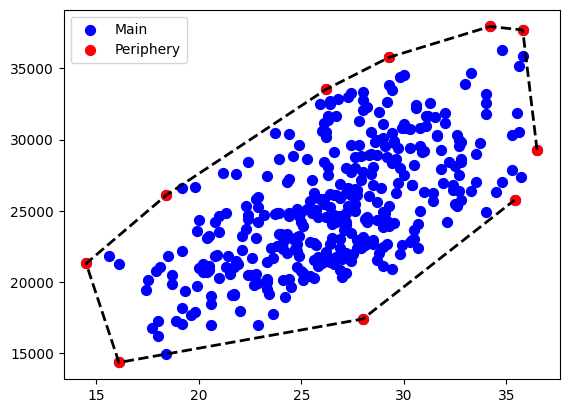

In [62]:
#Read and import file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from sklearn.base import BaseEstimator
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import seaborn as sns
from scipy.spatial import ConvexHull

#data = pd.read_csv('/content/drive/MyDrive/Master/Courses/pandas-completo/Data Science/Beer.csv')

df = upload_file()
selected_column = select_column(df)
convex_hull(selected_column)





In [39]:
def upload_file():
    file_path = input("Please enter the file path or URL to upload: ")
    df = pd.read_csv(file_path)
    return df

In [12]:
def select_column(dataframe):

        print("Columns in the DataFrame:")
        for column in dataframe.columns:
            print(column)


        selected_columns = []
        while len(selected_columns) < 2:
            column_name = input("Enter the name of a column: ")
            if column_name in dataframe.columns:
                selected_columns.append(column_name)
            else:
                print("Please enter a valid column name.")


        selected_df = dataframe[selected_columns]

        return selected_df

In [61]:
#ConvexHull
def convex_hull(data):
    xy = data.values
    hull = ConvexHull(xy) # Convex Hull is a function where the next convex angle is found.
    periphery_indices = hull.vertices #Set the index os all periphery in a variable
    periphery_indices = periphery_indices.astype(int)
    periphery_points = data.iloc[periphery_indices] #Set the all periphery points in the graphic in a variable
    graphic = plt.scatter(data.iloc[:, 0], data.iloc[:, 1], s=50, c='b', label='Main') #Plot the all the points in the graphic
    graphic = plt.scatter(periphery_points.iloc[:, 0], periphery_points.iloc[:, 1], s=50, c='r', label='Periphery') # Paint the periphery in red and save in graphic
    graphic = plt.plot(data.iloc[periphery_indices, 0], data.iloc[periphery_indices, 1], 'k--', lw=2)#Conect all the periphery point with line and save in graphic
    plt.legend()# Display the graphic
    plt.show()# Display the graphic



In [ ]:
#Convex Hull Using ChatGPT
#To plot all the data points on the periphery, you can use the Convex Hull method, which will include all the points that form the convex hull,
# not just the boundary points. Here's an example of how to do this using Python and the matplotlib library:

# Generate or load your dataset X (n_samples, n_features)
X = data[['temp_max', 'consumption']].values
# Calculate the convex hull
hull = ConvexHull(X)

# Get the indices of all points on the convex hull
periphery_indices = hull.vertices

# Plot all data points
plt.scatter(X[:, 0], X[:, 1], s=50, c='b', label='data')

# Plot all points on the convex hull
plt.scatter(X[periphery_indices, 0], X[periphery_indices, 1], s=50, c='r', label='Periphery Points')

plt.legend()
plt.title("Plotting all Periphery Points using Convex Hull")
plt.show()

In [ ]:
#IsolationForest
# Extract the feature columns
X = data[['temp_max', 'consumption']]

# Create an Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust contamination based on your dataset

# Fit the model to the data
model.fit(X)

# Predict anomalies (outliers)
outliers = model.predict(X)

# Extract the anomaly points
anomaly_points = X[outliers == -1]

print("Anomaly Points:")
print(anomaly_points)

Bounding Box using ChatGPT
>
Rafael : can you do an exemple of bounding box with python.
>
ChatGPT: Generated
```
# Extract the feature columns
# Calculate the minimum and maximum values for each feature
# Define the bounding box
```
Rafael: how can i do a plot with the anwser in Bounding Box:
```
# Filter points within the bounding box
# Create a scatter plot for all data points
# Create a rectangle for the bounding box
# Plot the
# Highlight points within the bounding box
```
Rafael: ValueError: Can only compare identically-labeled Series objects
---> 19     (X["temp_max"] >= bounding_box["min_temp_max
>
ChatGPT: Fixed the Code, and return the atual code
```
This corrected code should allow you to create a plot with the bounding box and points within the box for your dataset. Make sure to replace "dataset.csv" with the path to your CSV file and adjust the column names as needed.
```














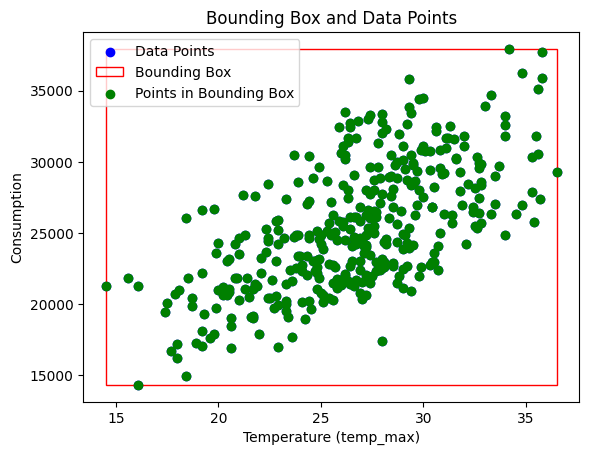

In [ ]:
#Bounding Box

# Extract the feature columns
X = data[['temp_max', 'consumption']]

# Calculate the minimum and maximum values for each feature
min_vals = X.min()
max_vals = X.max()

# Define the bounding box
bounding_box = {
    "min_temp_max": min_vals[0],
    "max_temp_max": max_vals[0],
    "min_consumption": min_vals[1],
    "max_consumption": max_vals[1]
}

# Filter points within the bounding box
points_within_box = X[
    (X["temp_max"] >= bounding_box["min_temp_max"]) &
    (X["temp_max"] <= bounding_box["max_temp_max"]) &
    (X["consumption"] >= bounding_box["min_consumption"]) &
    (X["consumption"] <= bounding_box["max_consumption"])
]

# Create a scatter plot for all data points
plt.scatter(X["temp_max"], X["consumption"], c='b', label='Data Points')

# Create a rectangle for the bounding box
rectangle = plt.Rectangle(
    (bounding_box["min_temp_max"], bounding_box["min_consumption"]),
    bounding_box["max_temp_max"] - bounding_box["min_temp_max"],
    bounding_box["max_consumption"] - bounding_box["min_consumption"],
    color='r',
    fill=False,
    label='Bounding Box'
)

# Plot the rectangle
plt.gca().add_patch(rectangle)

# Highlight points within the bounding box
plt.scatter(points_within_box["temp_max"], points_within_box["consumption"], c='g', label='Points in Bounding Box')

plt.xlabel("Temperature (temp_max)")
plt.ylabel("Consumption")
plt.legend()
plt.title("Bounding Box and Data Points")
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
